# Linear Regression

In this lab, we are going to do some curve fitting, to understand simple concepts like inputs, model and outputs. We will see that the size of the data, the assumptions on the data, the kind of model we choose have a great impact on the final curves, even on a simple example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class LinearBasis(object):
    """A linear basis to fit a curve based on least square minization."""        
    def makeMatrix(self, x):
        self.x = x
        self.basis = []
        
    def __str__(self):
        return 'basis'

    def show(self):
        for t in self.basis:
            plt.plot(self.x, t, lw=1)
            
    def __len__(self):
        return len(self.basis)
    
    def get(self, w):
        phi = np.matrix(self.basis).transpose()
        return phi * w
    
    def fit(self, t, regular):
        """Least square fitting"""
        phi = np.matrix(self.basis).transpose()
        t = np.matrix(t).reshape((len(t), 1))
        symPhi = phi.transpose() * phi
        regI = regular * np.eye(len(symPhi))
        phi2 = (regI + symPhi)**(-1)*phi.transpose()
        w = phi2 * t
        return w
    
    def showWeights(self, w):
        y = self.get(w)
        x = np.eye(w.shape[0])
        np.fill_diagonal(x, w)
        x = np.matrix(x)
        phi = np.matrix(self.basis).transpose()
        print(phi.shape, x.shape)
        comps = phi * x
        print(comps.shape)
        for t in comps.transpose():
            print(self.x.shape, t.shape)
            plt.plot(self.x, t.transpose(), lw=1)


class PolynomialBasis(LinearBasis):
    def __init__(self, order):
        super().__init__()
        self.order = order
        
    def __str__(self):
        return 'Polynomial order {0}'.format(self.order)
        
    def makeMatrix(self, x):
        super().makeMatrix(x)
        for k in range(self.order+1):
            self.basis.append(x**k)
        self.basis = np.array(self.basis)

## Make some artificial data

Here we build some noisy inputs, drawn from a sine function to which we had white noise. For this we randomly sample.

$x_i \sim U([0,1])$

$\omega \sim \mathcal{N}(0, 1)$

$y_i = sin(x_i) + \alpha . \omega$

Where $\alpha$ controls the strength of the noise.

In [3]:
class SampledFunction(object):
    """A class to represent a function being sampled on [0, 1]"""
    def __init__(self, num_points, noise):
        self.num_points = num_points
        self.noise = noise
        
        # Sample points
        self.x = np.random.uniform(size=(self.num_points,))
        self.x.sort()
        
        # full [0, 1] range for debug only
        self.x_full = np.arange(0, 1, 1e-2)
                
        # Make values, with additive noise.
        self.y_noise = self.noise * np.random.normal(size=(self.num_points,))
        self.y = self.evaluate(self.x) + self.y_noise
        
    def evaluate(self, x):
        pass
    
    def show(self, ax, title, show_underlying=False):
        ax.plot(self.x, self.y, 'o', label='examples')
        if show_underlying:
            ax.plot(self.x_full, self.evaluate(self.x_full), '--', lw=2, label='Underlying function')
        ax.set_title(title)
        ax.legend()
        
    def fit(self, basis, ax, show_underlying, regular=0.0):
        basis.makeMatrix(self.x)
        w = basis.fit(self.y, regular)

        # Show fit on the full range [0, 1] for debug only
        basis.makeMatrix(self.x_full)
        y_full = basis.get(w)
        
        self.show(ax=ax, title=str(basis), show_underlying=show_underlying)
        ax.plot(self.x_full, y_full, lw=3, label='Fit')
        ax.legend()
        

class SampledSine(SampledFunction):
    def __init__(self, num_points, noise, speed):
        self.speed = speed
        super().__init__(num_points, noise)
        
    def evaluate(self, x):
        return np.sin(self.speed * x)

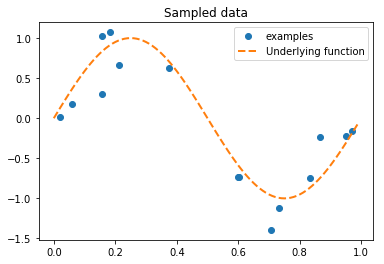

In [4]:
np.random.seed(42)
samples = SampledSine(num_points=15, noise=0.2, speed=2*np.pi)

fig, ax = plt.subplots()
samples.show(ax, title='Sampled data', show_underlying=True)

# Fits different polynomials

Use the least-square to fit a polynomial.

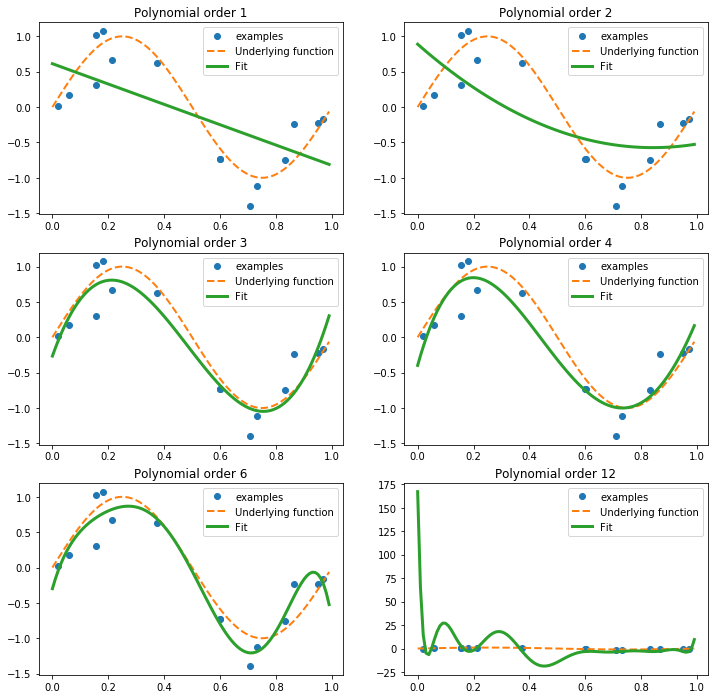

In [5]:
orders = [1, 2, 3, 4, 6, 12]
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
for k, order in enumerate(orders):
    i = int(k / 2)
    j = k - i * 2
    ax = axes[i][j]
    basis = PolynomialBasis(order=order)
    samples.fit(basis, ax, show_underlying=True)

## Fighting over-fitting: more samples


In [6]:
SVC()np.random.seed(42)
samples = SampledSine(num_points=150, noise=0.2, speed=2*np.pi)
basis = PolynomialBasis(order=11)
fig, ax = plt.subplots()
samples.fit(basis, ax, show_underlying=True)

SyntaxError: invalid syntax (<ipython-input-6-422e17c1d048>, line 1)

## Fighting over-ftting with regularization

In [ ]:
np.random.seed(42)
samples = SampledSine(num_points=15, noise=0.2, speed=2*np.pi)
basis = PolynomialBasis(order=11)
fig, ax = plt.subplots()
samples.fit(basis, ax, show_underlying=True, regular=3e-3)

## Another example: other basis

### Polynomial

In [ ]:
np.random.seed(42)
samples = SampledSine(num_points=100, noise=0.2, speed=10*np.pi)
basis = PolynomialBasis(order=40)
fig, ax = plt.subplots()
samples.fit(basis, ax, show_underlying=True, regular=1e-12)

## Radial basis function

In [ ]:
class RBFBasis(LinearBasis):
    def __init__(self, sigma):
        super().__init__()
        self.sigma = sigma
        
    def __str__(self):
        return 'RBF $\sigma = {0:.2f}$'.format(self.sigma)
        
    def makeMatrix(self, x):
        super().makeMatrix(x)        
        for mu in np.arange(x[0], x[-1] + self.sigma / 2, 2.5 *  self.sigma):
            self.basis.append(np.exp(-0.5 * (x - mu) ** 2 / self.sigma ** 2))
        self.basis = np.array(self.basis)

In [ ]:
basis = RBFBasis(sigma=1/16)
x = np.arange(0, 1, 1e-3)
basis.makeMatrix(x)
print(len(basis))
basis.show()

In [ ]:
fig, ax = plt.subplots()
samples.fit(basis, ax, show_underlying=True, regular=1e-2)

## Sigmoid Basis

In [ ]:
class SigmoidBasis(LinearBasis):
    def __init__(self, n, slope):
        super().__init__()
        self.slope = slope
        self.n = n
        
    def __str__(self):
        return 'Sigmoid slope {0:.2f}'.format(self.slope)
        
    def makeMatrix(self, x):
        super().makeMatrix(x)
        for i in range(self.n + 1):
            mu = (i) / (self.n + 1)
            self.basis.append(1 / (1 + np.exp(-self.slope * (x - mu))))
        self.basis = np.array(self.basis)

In [ ]:
basis = SigmoidBasis(n=12, slope=25)
x = np.arange(0, 1, 1e-3)
basis.makeMatrix(x)
print(len(basis))
basis.show()